# Loan predictions

## Problem Statement

We want to automate the loan eligibility process based on customer details that are provided as online application forms are being filled. You can find the dataset [here](https://drive.google.com/file/d/1h_jl9xqqqHflI5PsuiQd_soNYxzFfjKw/view?usp=sharing). These details concern the customer's Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and other things as well. 

|Variable| Description|
|Loan_ID| Unique Loan ID|
|Gender| Male/ Female|
|Married| Applicant married (Y/N)|
|Dependents| Number of dependents|
|Education| Applicant Education (Graduate/ Under Graduate)|
|Self_Employed| Self employed (Y/N)|
|ApplicantIncome| Applicant income|
|CoapplicantIncome| Coapplicant income|
|LoanAmount| Loan amount in thousands|
|Loan_Amount_Term| Term of loan in months|
|Credit_History| credit history meets guidelines|
|Property_Area| Urban/ Semi Urban/ Rural|
|Loan_Status| Loan approved (Y/N)



### The problem will be explored in the following stages:

1. Hypothesis Generation – understanding the problem better by brainstorming possible factors that can impact the outcome
2. Train/Test Split – Splitting the dataset into training and test sets that are random and representative
3. Data Cleaning - Handling missing values and setting proper dtypes
4. Data Exploration – Looking for patterns in the data
5. Feature Engineering – modifying existing variables and creating new ones for analysis
6. Model Building – making predictive models on the data

## 1. Hypothesis Generation
Some factors that may be important in determining loan approval are:
* Credit history and score
* Income
* Debt-to-income ratio
* Employment History
* Loan amount and term


## 2. Train/Test Split
Splitting the dataset into training and test sets that are random and representative.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

df = pd.read_csv("../data/data.csv") 
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Prior to any further modification, the data needs to be split. To make sure that the dataset is representative the balance of the classes needs to be assessed.

In [14]:
# Check the balance of the classes
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

The dataset is clearly unbalanced so the train_test_split will have to be stratified.

In [15]:
# Create a random and representative train/test split
from sklearn.model_selection import train_test_split

# Split the data into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(df[features], df['Loan_Status'], test_size=0.2, stratify = df['Loan_Status'], random_state=42)

## 3. Data Cleaning
Handling missing values and setting proper dtypes

In [16]:
#Check for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Some missing values will deal with themselves as columns are excluded from the model. Discriminatory features can be the first to go. These columns are:
* Gender - Using gender as a feature for loan approval decisions would violate the principle of equal opportunity and fair treatment (illegal)
* Married - Same reasoning as above, it is a violation of the Canadian Human Rights Act (CHRA) to use marital status as a factor in determining loan approvals.

In [3]:
discrim_cols = ['Gender', 'Married']

There are other columns that may be considered discriminatory if used as factors without clear definition as to how they impact the applicants ability to repay the loan. This sort of investigation is outside the scope of this project, and so the following columns will also not be considered by the model:
* Dependents - Discrimination on the basis of family status
* Education - Discrimination on the basis of race, since the racial inequality in Canadian educational opportunity is currently under scrutiny. 
* Property_area - This feature is too general, it opens up the potential for bias on the basis race, ethnic or national origin, family status, and other protected characteristics. Geographic location can be an important factor however, and this feature could be remedied by division into features more specifically applicable to loan repayment like property_value or property_market_growth.

In [4]:
potential_discrim_cols = ['Dependents', 'Education', 'Property_area']

The remaining columns for analysis and modelling are:
* ApplicantIncome
* CoapplicantIncome
* LoanAmount
* Loan_Amount_Term
* Credit_History

In [5]:
features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

In [6]:
# Now to focus on the remaining features
EDA_df = df[features].copy()
EDA_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ApplicantIncome    614 non-null    int64  
 1   CoapplicantIncome  614 non-null    float64
 2   LoanAmount         592 non-null    float64
 3   Loan_Amount_Term   600 non-null    float64
 4   Credit_History     564 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 24.1 KB


<Axes: xlabel='LoanAmount', ylabel='Count'>

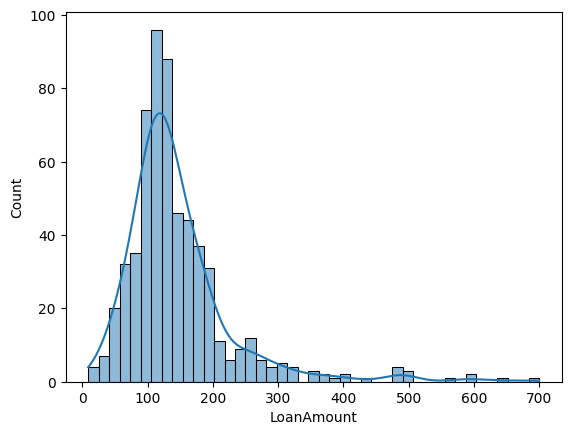

In [7]:
# Check out distributions of variables with missing values
import seaborn as sns

sns.histplot(data=EDA_df, x="LoanAmount", kde=True)

<Axes: xlabel='Loan_Amount_Term', ylabel='Count'>

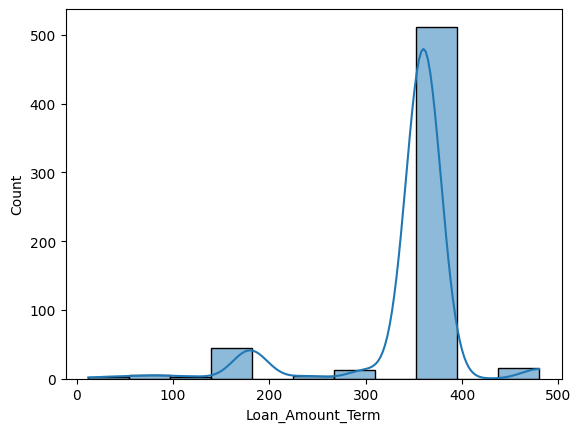

In [8]:
sns.histplot(data=EDA_df, x="Loan_Amount_Term", kde=True)

In [9]:
EDA_df['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

<Axes: xlabel='Credit_History', ylabel='count'>

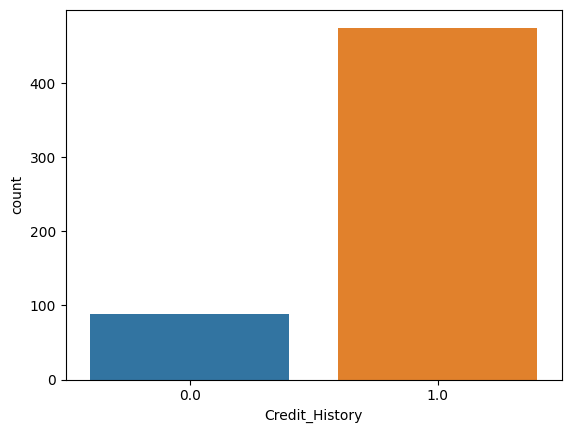

In [10]:
sns.countplot(data=EDA_df, x="Credit_History")

Determining the best strategy for missing value handling requires an understanding of each variable:
* LoanAmount
    * 3.6% null - low (not concerning)
    * Continuous
    * Right skewed
    
* Loan_Amount_Term
    * 2.3% null - low (not concerning)
    * Not continuous like expected, but rather 10 discrete bins
    * Left skewed
    
* Credit_History
    * 8.1% null - low/moderate (somewhat concerning)
    * Categorical binary
    * Greatly skewed to 1.0 (Credit history meets guidelines)

**LoanAmount** is skewed and continuous, so the median value will be used to impute missing values
**Loan_Amount_Term** is skewed and appears discrete, so the modal value will be used to impute missing values
**Credit_History** is binary, so the modal value will be used to impute missing values

In [11]:
# Impute missing vals with the median value
EDA_df['LoanAmount'].fillna(EDA_df['LoanAmount'].median(), inplace=True)

# Impute missing vals with the modal value
EDA_df['Loan_Amount_Term'].fillna(EDA_df['Loan_Amount_Term'].mode()[0], inplace=True)
EDA_df['Credit_History'].fillna(EDA_df['Credit_History'].mode()[0], inplace=True)

In [12]:
# Fix dtypes
EDA_df['ApplicantIncome'] = EDA_df['ApplicantIncome'].astype(float)
EDA_df['Credit_History'] = EDA_df['Credit_History'].astype(int)

In [13]:
# Validate missing value handling
EDA_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ApplicantIncome    614 non-null    float64
 1   CoapplicantIncome  614 non-null    float64
 2   LoanAmount         614 non-null    float64
 3   Loan_Amount_Term   614 non-null    float64
 4   Credit_History     614 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 24.1 KB


## 4. Data Exploration

### Distribution analysis

Study distribution of various variables

So far we know:
- LoanAmount is **right skewed**
- Loan_Amount_Term is **left skewed**
- Credit_History is **unbalanced** (Significantly more applicants with a credit history that meets guidelines than applicants with a credit history that does not)

Descriptive Stats:

In [28]:
X_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,491.000000,491.000000,491.000000,491.000000,491.000000
mean,5529.997963,1569.537271,146.523422,341.743381,0.863544
std,6457.784318,2789.523475,85.386044,65.107943,0.343622
min,210.000000,0.000000,9.000000,12.000000,0.000000
25%,2906.000000,0.000000,100.500000,360.000000,1.000000
50%,3859.000000,1032.000000,128.000000,360.000000,1.000000
75%,5825.000000,2241.000000,165.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


The distributions left to analyze with histograms are ApplicantIncome and CoapplicantIncome, as well as boxplots of all numerical features

Histograms:

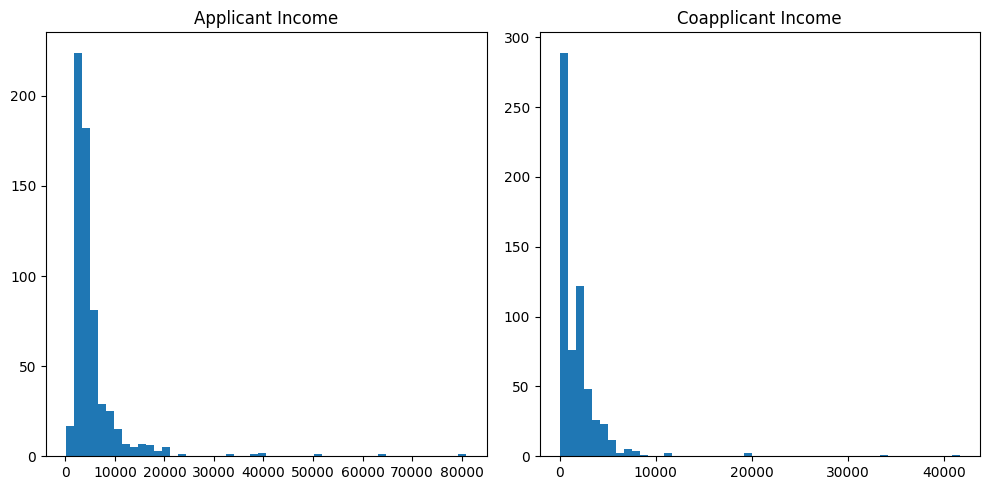

In [24]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

axes[0].hist(df['ApplicantIncome'], bins=50)
axes[0].set_title('Applicant Income')

axes[1].hist(df['CoapplicantIncome'], bins=50)
axes[1].set_title('Coapplicant Income')

plt.tight_layout()
plt.show()

Boxplots:

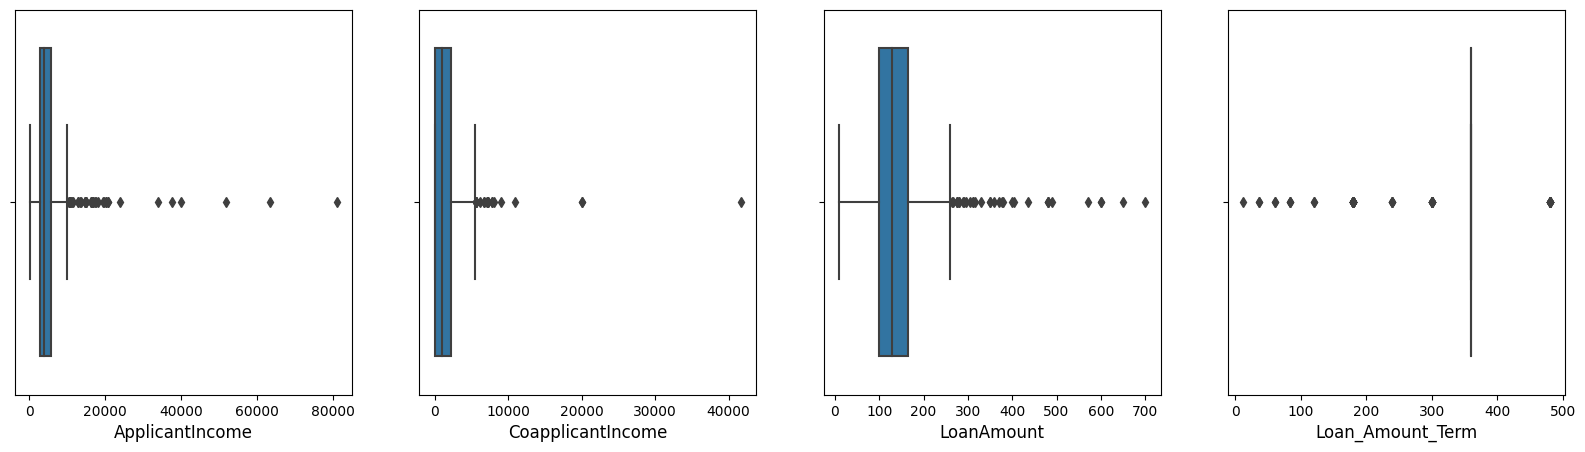

In [22]:
numerical_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

fig, axs = plt.subplots(ncols=4, figsize=(20,5))
for i, feature in enumerate(numerical_features):
    sns.boxplot(x=X_train[feature], ax=axs[i])
    axs[i].set_xlabel(feature, fontsize=12)
plt.show()

ApplicantIncome and CoapplicantIncome are both right skewed distributions, as is typical of income data. The boxplots indicate many of the values in these distributions are extreme, however, these extreme values are not unreasonable. To get a better understanding of the extreme values they can be obserevd in the context of their records. 

In [25]:
# Display the 5 highest values in ApplicantIncome
print(X_train.nlargest(5, 'ApplicantIncome'))

# Display the 5 highest values in CoapplicantIncome
print(X_train.nlargest(5, 'CoapplicantIncome'))

# Display the 5 highest values in LoanAmount
print(X_train.nlargest(5, 'LoanAmount'))

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
409          81000.0                0.0       360.0             360.0   
333          63337.0                0.0       490.0             180.0   
171          51763.0                0.0       700.0             300.0   
155          39999.0                0.0       600.0             180.0   
443          37719.0                0.0       152.0             360.0   

     Credit_History  
409               0  
333               1  
171               1  
155               0  
443               1  
     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
600            416.0            41667.0       350.0             180.0   
417           1600.0            20000.0       239.0             360.0   
402           2500.0            20000.0       103.0             360.0   
9            12841.0            10968.0       349.0             360.0   
122           2137.0             8980.0       137.0             

Extreme Applicant incomes seem to not typically have Coapplicants. Extreme Coapplicant incomes typically accompany applicants with lower incomes, and in the case that the applicants income is also high, the LoanAmount is quite high. 
Note: I need to make adjustments in order to do an analysis of how these extreme values might affect loan approvals.

## 3. Data Cleaning

This step typically involves imputing missing values and treating outliers. 

### Imputing Missing Values

Missing values may not always be NaNs. For instance, the `Loan_Amount_Term` might be 0, which does not make sense.



Impute missing values for all columns. Use the values which you find most meaningful (mean, mode, median, zero.... maybe different mean values for different groups)

### Extreme values
Try a log transformation to get rid of the extreme values in `LoanAmount`. Plot the histogram before and after the transformation

Combine both incomes as total income and take a log transformation of the same.

## 4. Building a Predictive Model

Try paramater grid search to improve the results

## 5. Using Pipeline
If you didn't use pipelines before, transform your data prep, feat. engineering and modeling steps into Pipeline. It will be helpful for deployment.

The goal here is to create the pipeline that will take one row of our dataset and predict the probability of being granted a loan.

`pipeline.predict(x)`

## 6. Deploy your model to cloud and test it with PostMan, BASH or Python